In [3]:
import datetime as dt
import pandas as pd
from pandas_datareader import data as pdr
import plotly.offline as pyo
import plotly.graph_objects as go
from plotly.subplots import make_subplots

pyo.init_notebook_mode(connected=True)

pd.options.plotting.backend = 'plotly'
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pandas_ta as pandas_ta
%matplotlib inline


In [9]:
tickers = ['AAPL']
df = yf.download(tickers, start='2018-12-01', end='2023-01-01')

df['MA50'] = df['Close'].rolling(window=50, min_periods=0).mean()
df['MA200'] = df['Close'].rolling(window=200, min_periods=0).mean()
df['MA200'].head(30)

[*********************100%%**********************]  1 of 1 completed


Date
2018-12-03    46.205002
2018-12-04    45.188751
2018-12-06    44.685834
2018-12-07    44.045001
2018-12-10    43.716001
2018-12-11    43.456251
2018-12-12    43.287501
2018-12-13    43.218751
2018-12-14    43.013334
2018-12-17    42.810501
2018-12-18    42.692955
2018-12-19    42.487084
2018-12-20    42.234808
2018-12-21    41.909643
2018-12-24    41.562834
2018-12-26    41.420938
2018-12-27    41.280736
2018-12-28    41.157223
2018-12-31    41.066579
2019-01-02    40.987250
2019-01-03    40.728215
2019-01-04    40.561705
2019-01-07    40.406087
2019-01-08    40.292813
2019-01-09    40.214200
2019-01-10    40.146346
2019-01-11    40.069537
2019-01-14    39.977768
2019-01-15    39.918793
2019-01-16    39.879333
Name: MA200, dtype: float64

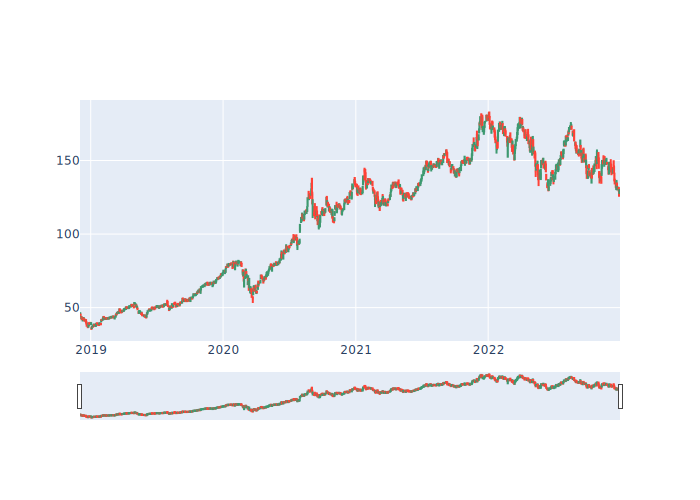

In [10]:
fig = go.Figure(data=[go.Candlestick(x=df.index,
                open=df['Open'],
                high=df['High'],
                low=df['Low'],
                close=df['Close'])])

fig.show(renderer="svg")

In [7]:
fig = make_subplots(rows=2, cols=1, shared_xaxes=True,
               vertical_spacing=0.10, subplot_titles=('CBA', 'Volume'),
               row_width=[0.2, 0.7])

fig.add_trace(go.Candlestick(x=df.index, open=df["Open"], high=df["High"],
                low=df["Low"], close=df["Close"], name="OHLC"),
                row=1, col=1)

fig.add_trace(go.Scatter(x=df.index, y=df["MA50"], marker_color='grey',name="MA50"), row=1, col=1)
fig.add_trace(go.Scatter(x=df.index, y=df["MA200"], marker_color='lightgrey',name="MA200"), row=1, col=1)

fig.add_trace(go.Bar(x=df.index, y=df['Volume'], marker_color='red', showlegend=False), row=2, col=1)

fig.update_layout(
    title='CBA historical price chart',
    xaxis_tickfont_size=12,
    yaxis=dict(
        title='Price ($/share)',
        titlefont_size=14,
        tickfont_size=12,
    ),
    autosize=False,
    width=800,
    height=500,
    margin=dict(l=50, r=50, b=100, t=100, pad=4),
    paper_bgcolor='LightSteelBlue'
)

fig.update(layout_xaxis_rangeslider_visible=True)
fig.show(renderer="colab")
